# Project 2: Continuous Control
---
In this notebook, we train DDPG on the Reacher unity environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# import the ddpg agent
from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
from unityagents import UnityEnvironment

# select the unity environment
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# Initialise the ddpg agent
agent = Agent(state_size=33, action_size=4, random_seed=2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the Reacher Agent with DDPG

Episode 425	Average Score: 30.06	Score: 35.90
Environment solved in 325 episodes!	Average Score: 30.06


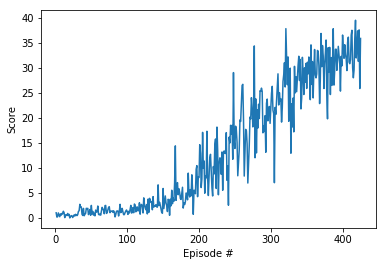

In [3]:
def ddpg(n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]           # reset the environment 
        state = env_info.vector_observations[0]                     # get the current state
        agent.reset()                                               # reset the agent
        score = 0                                                   # initialize the score
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]                 # send action to tne environment
            next_state = env_info.vector_observations[0]            # get next state
            reward = env_info.rewards[0]                            # get reward
            done = env_info.local_done[0]                           # see if episode finished
            agent.step(state, action, reward, next_state, done)     # agent takes one step to train
            state = next_state                                      # roll over state to next time step
            score += reward                                         # update the score
            if done:                                                # exit loop if episode finished
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [ ]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]    # reset the environment    
state = env_info.vector_observations                  # get the current state 
score = 0                                             # initialize the score
for i in range(500):
    action = agent.act(state)                         # select an action
    env_info = env.step(action)[brain_name]           # send action to tne environment
    next_state = env_info.vector_observations[0]      # get next state
    reward = env_info.rewards[0]                      # get reward
    done = env_info.local_done[0]                     # see if episode finished
    score += env_info.rewards[0]                      # update the score
    state = next_state                                # roll over state to next time step
    if done:                                          # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(score))

env.close()